# Module 6 Exercise: Finding a Dataset
## Author: Jacob Mendez

## Dataset: https://www.kaggle.com/datasets/usdot/flight-delays/

### Question 1: What websites, keywords, queries, or other strategies did you use?

#### Answer: I ultimately just searched on Kaggle and filtered the filesize to find some interesting, large datasets. I originally was looking at a credit card fraud dataset, but decided against it. I did however use the size of the file as a reference.

### Question 2-3: Downloading the dataset for processing and loading it in.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("flights.csv")

print(df.head())

print(len(df))

/tmp/ipykernel_226439/3037407381.py:5: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("flights.csv")


   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   
2            SFO                 CLT                   20  ...         811.0   
3            LAX                 MIA                   20  ...         756.0   
4            SEA                 ANC                   25  ...         259.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -

### Inspecting the data

In [10]:
print(df.columns.to_list())


['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']


In [11]:
# All data is from 2015 so the year column is useless to us.
df.drop(columns=['YEAR'], inplace=True)

### Question 4.1: Tables

In [12]:
# Best performing airlines

df['AIRLINE'].value_counts().head(10)

AIRLINE
WN    1261855
DL     875881
AA     725984
OO     588353
EV     571977
UA     515723
MQ     294632
B6     267048
US     198715
AS     172521
Name: count, dtype: int64

In [13]:
# Busiest Airports

df['ORIGIN_AIRPORT'].value_counts().head(10)

ORIGIN_AIRPORT
ATL    346836
ORD    285884
DFW    239551
DEN    196055
LAX    194673
SFO    148008
PHX    146815
IAH    146622
LAS    133181
MSP    112117
Name: count, dtype: int64

In [14]:
# Avg. Arrival Delay by Airline

df.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().sort_values()

AIRLINE
AS    -0.976563
DL     0.186754
HA     2.023093
AA     3.451372
US     3.706209
WN     4.374964
VX     4.737706
UA     5.431594
OO     5.845652
MQ     6.457873
EV     6.585379
B6     6.677861
F9    12.504706
NK    14.471800
Name: ARRIVAL_DELAY, dtype: float64

### Question 4.2: Charts

<Axes: title={'center': 'Average Arrival Delay by Month'}, xlabel='MONTH', ylabel='Minutes'>

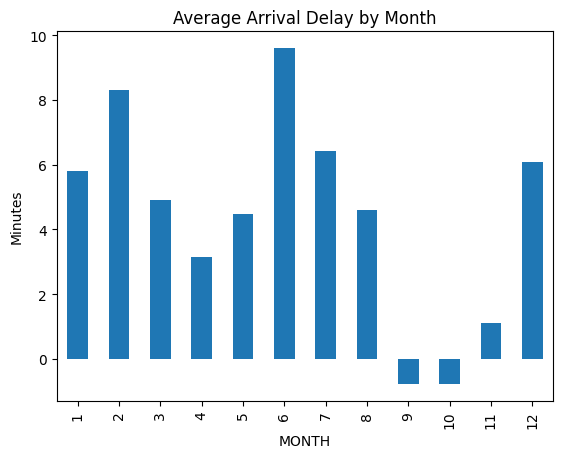

In [17]:
monthly_delay = df.groupby('MONTH')['ARRIVAL_DELAY'].mean()
monthly_delay.plot(kind='bar', title='Average Arrival Delay by Month', ylabel='Minutes')

### Question 5: Assumptions

In [18]:
# Assumption 1: Are flight delays correlated to airlines?

df.groupby('AIRLINE')['CANCELLED'].mean().sort_values(ascending=False)

AIRLINE
MQ    0.050996
EV    0.026629
US    0.020466
NK    0.017073
OO    0.016929
B6    0.016012
AA    0.015040
UA    0.012745
WN    0.012714
VX    0.008626
F9    0.006473
DL    0.004366
AS    0.003878
HA    0.002242
Name: CANCELLED, dtype: float64

Text(0.5, 0, 'Arrival Delay (minutes)')

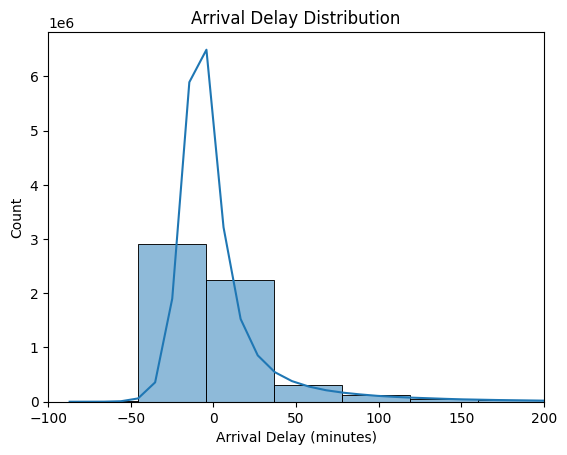

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of arrival delays
sns.histplot(df['ARRIVAL_DELAY'], bins=50, kde=True)
plt.xlim(-100, 200)  # avoid extreme outliers
plt.title("Arrival Delay Distribution")
plt.xlabel("Arrival Delay (minutes)")

In [3]:
features = df[['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TAXI_OUT', 'TAXI_IN', 'AIR_TIME']].dropna()

# Optional: Limit to speed things up
features = features.sample(10000, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
features['Cluster'] = clusters

(-50.0, 300.0)

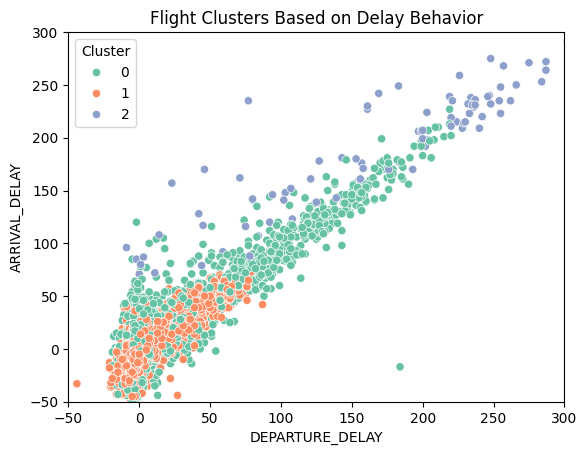

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot using just DEP_DELAY vs ARR_DELAY
sns.scatterplot(data=features, x='DEPARTURE_DELAY', y='ARRIVAL_DELAY', hue='Cluster', palette='Set2')
plt.title("Flight Clusters Based on Delay Behavior")
plt.xlim(-50, 300)
plt.ylim(-50, 300)

Text(0.5, 1.0, 'Flight Clusters (PCA Projection)')

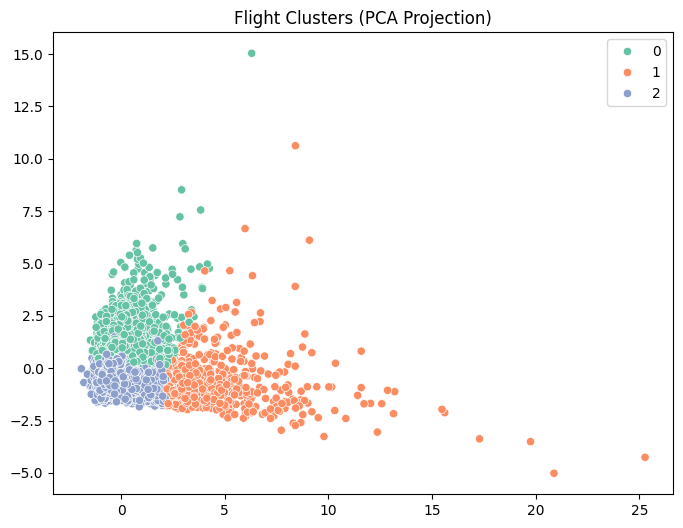

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title("Flight Clusters (PCA Projection)")

In [8]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01, random_state=42)
features['Anomaly'] = iso.fit_predict(X_scaled)  # -1 = anomaly

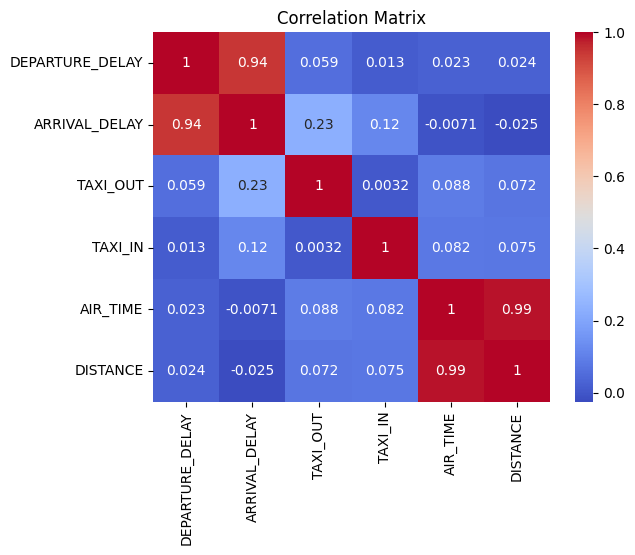

In [13]:
numeric_df = df[['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TAXI_OUT', 'TAXI_IN', 'AIR_TIME', 'DISTANCE']]
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

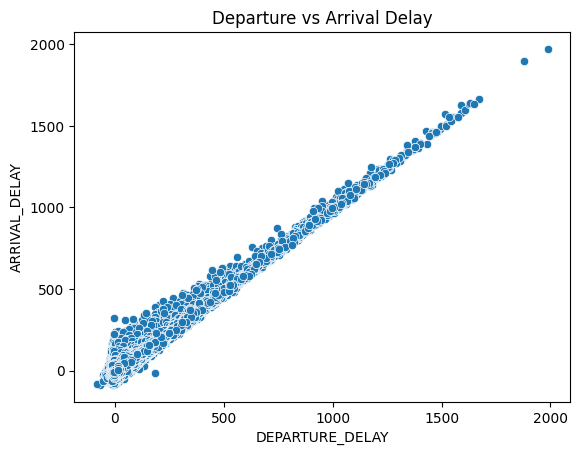

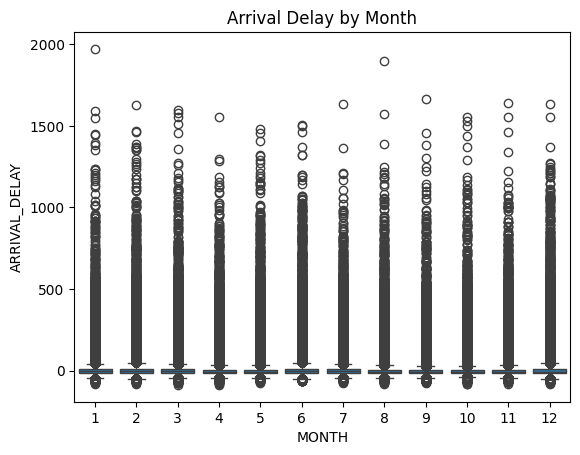

In [15]:
sns.scatterplot(data=df, x='DEPARTURE_DELAY', y='ARRIVAL_DELAY')
plt.title("Departure vs Arrival Delay")
plt.show()

sns.boxplot(data=df, x='MONTH', y='ARRIVAL_DELAY')
plt.title("Arrival Delay by Month")
plt.show()

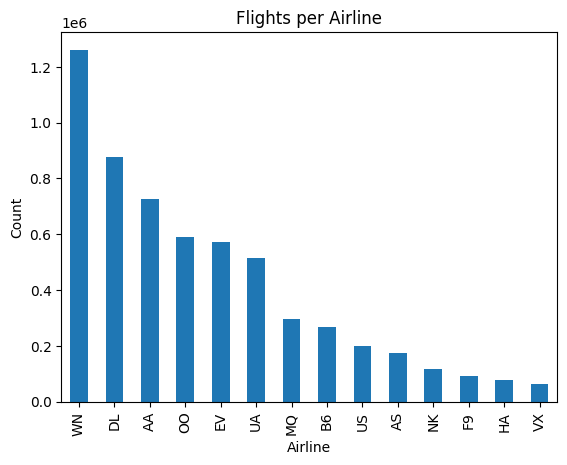

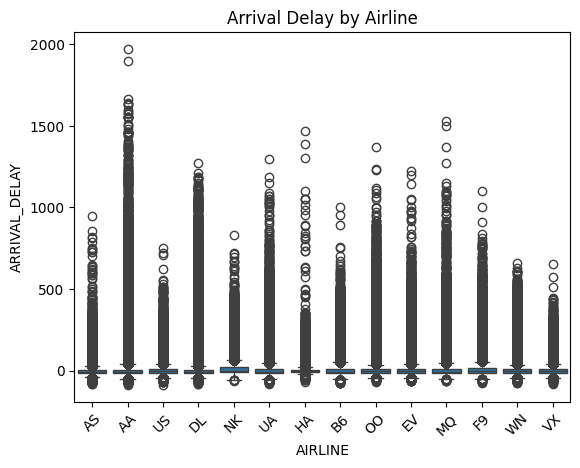

In [16]:
# Flights per airline
df['AIRLINE'].value_counts().plot(kind='bar', title='Flights per Airline')
plt.xlabel("Airline")
plt.ylabel("Count")
plt.show()

# Delay by airline
sns.boxplot(data=df, x='AIRLINE', y='ARRIVAL_DELAY')
plt.xticks(rotation=45)
plt.title("Arrival Delay by Airline")
plt.show()